<a href="https://colab.research.google.com/github/asmik417/asmik417/blob/main/Copy_of_Phishing_Sites_Detector_%26_Complete_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.7/475.7 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install python-whois
!pip install ipwhois

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.3/208.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
import whois
import datetime
import socket
%matplotlib inline
from ipwhois import IPWhois
from urllib.parse import urlparse
from urllib.parse import unquote
from urllib.parse import urlencode
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup # use for scraping the data from website
from selenium import webdriver # use for automation chrome
import networkx as nx # for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

import pickle
import warnings
warnings.filterwarnings('ignore')


##### * Importing some useful libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the dataset
phish_data1 = pd.read_csv('/content/drive/MyDrive/ML models/phishing model/phishing_site_urls.csv')
phish_data=pd.read_csv('/content/drive/MyDrive/ML models/phishing model/dataset_phishing.csv')

In [ ]:
print(phish_data.columns)

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [ ]:
phish_data=phish_data[['url','status']]
phish_data.columns=['URL','Label']

In [ ]:
for i in range(len(phish_data)):
  if phish_data['Label'][i]=='legitimate':
    phish_data['Label'][i]='good'
  else:
    phish_data['Label'][i]='bad'

In [ ]:
phish_data = pd.concat([phish_data, phish_data1], ignore_index=True)

In [ ]:
phish_data.head()

,URL,Label
0,http://www.crestonwood.com/router.php,good
1,http://shadetreetechnology.com/V4/validation/a...,bad
2,https://support-appleld.com.secureupdate.duila...,bad
3,http://rgipt.ac.in,good
4,http://www.iracing.com/tracks/gateway-motorspo...,good


In [ ]:
phish_data.tail()

,URL,Label
560772,apple-checker.org/,bad
560773,apple-iclods.org/,bad
560774,apple-uptoday.org/,bad
560775,apple-search.info,bad
560776,https://rb.gy/j6v7f6?id=1964338349,bad


In [ ]:
phish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560777 entries, 0 to 560776
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     560777 non-null  object
 1   Label   560777 non-null  object
dtypes: object(2)
memory usage: 8.6+ MB


* **About dataset**
* Data is containg 5,49,346 unique entries.
* There are two columns.
* Label column is prediction col which has 2 categories
    A. Good - which means the urls is not containing malicious stuff and **this site is not a Phishing Site.**
    B. Bad - which means the urls contains malicious stuffs and **this site isa Phishing Site.**
* There is no missing value in the dataset.

In [ ]:
phish_data.isnull().sum() # there is no missing values

URL      0
Label    0
dtype: int64

* **Since it is classification problems so let's see the classes are balanced or imbalances**

In [ ]:
#create a dataframe of classes counts
label_counts = pd.DataFrame(phish_data.Label.value_counts())

In [ ]:
#visualizing target_col
fig = px.bar(label_counts, x=label_counts.index, y=label_counts.iloc[:, 0]) # Access the counts column
fig.show()

### Preprocessing
* **Now that we have the data, we have to vectorize our URLs. I used CountVectorizer and gather words using tokenizer, since there are words in urls that are more important than other words e.g ‘virus’, ‘.exe’ ,’.dat’ etc. Lets convert the URLs into a vector form.**

#### RegexpTokenizer
* A tokenizer that splits a string using a regular expression, which matches either the tokens or the separators between tokens.

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')#to getting alpha only

In [ ]:
phish_data.URL[0]

'http://www.crestonwood.com/router.php'

In [ ]:
# this will be pull letter which matches to expression
tokenizer.tokenize(phish_data.URL[0]) # using first row

['http', 'www', 'crestonwood', 'com', 'router', 'php']

In [ ]:
print('Getting words tokenized ...')
t0= time.perf_counter()
phish_data['text_tokenized'] = phish_data.URL.map(lambda t: tokenizer.tokenize(t)) # doing with all rows
t1 = time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words tokenized ...
Time taken 7.185808294000026 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized
41435,fgg4gde.zymichost.com/,bad,"[fgg, gde, zymichost, com]"
540578,easysupport.us/fl85xie,bad,"[easysupport, us, fl, xie]"
233555,norcalpreps.rivals.com/content.asp?cid=410631,good,"[norcalpreps, rivals, com, content, asp, cid]"
150359,17hmr.net/index.php?topic=6680.0,good,"[hmr, net, index, php, topic]"
495477,fra1.ib.adnxs.com/if?enc=m5mZmZmZuT80MzMzMzOzP...,bad,"[fra, ib, adnxs, com, if, enc, m, mZmZmZuT, Mz..."


#### SnowballStemmer
* Snowball is a small string processing language, gives root words

In [ ]:
stemmer = SnowballStemmer("english") # choose a language

In [ ]:
print('Getting words stemmed ...')
t0= time.perf_counter()
phish_data['text_stemmed'] = phish_data['text_tokenized'].map(lambda l: [stemmer.stem(word) for word in l])
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting words stemmed ...
Time taken 77.14654617100001 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed
482907,youtube.com/watch?v=78LWj8p4zNY,good,"[youtube, com, watch, v, LWj, p, zNY]","[youtub, com, watch, v, lwj, p, zni]"
484303,youtube.com/watch?v=H_koVeAut4c,good,"[youtube, com, watch, v, H, koVeAut, c]","[youtub, com, watch, v, h, koveaut, c]"
129926,redapplied.com/receipta,bad,"[redapplied, com, receipta]","[redappli, com, receipta]"
545900,demo.hubliclick.in/JHgy64HJBRd,bad,"[demo, hubliclick, in, JHgy, HJBRd]","[demo, hubliclick, in, jhgi, hjbrd]"
431798,ravensgab.com/2011/08/18/pre-season-match-up-k...,good,"[ravensgab, com, pre, season, match, up, kansa...","[ravensgab, com, pre, season, match, up, kansa..."


In [ ]:
print('Getting joiningwords ...')
t0= time.perf_counter()
phish_data['text_sent'] = phish_data['text_stemmed'].map(lambda l: ' '.join(l))
t1= time.perf_counter() - t0
print('Time taken',t1 ,'sec')

Getting joiningwords ...
Time taken 0.296773858999984 sec


In [ ]:
phish_data.sample(5)

,URL,Label,text_tokenized,text_stemmed,text_sent
326840,disneymovieslist.com/disney-channel-movies.asp,good,"[disneymovieslist, com, disney, channel, movie...","[disneymovieslist, com, disney, channel, movi,...",disneymovieslist com disney channel movi asp
166964,caadbelgique.blogspot.com/,good,"[caadbelgique, blogspot, com]","[caadbelgiqu, blogspot, com]",caadbelgiqu blogspot com
246694,rivals.yahoo.com/ncaa/basketball/players/89779,good,"[rivals, yahoo, com, ncaa, basketball, players]","[rival, yahoo, com, ncaa, basketbal, player]",rival yahoo com ncaa basketbal player
27403,aia2.com/y/Remax/index.html,bad,"[aia, com, y, Remax, index, html]","[aia, com, y, remax, index, html]",aia com y remax index html
242886,printmailservices.com/,good,"[printmailservices, com]","[printmailservic, com]",printmailservic com


### Visualization
**1. Visualize some important keys using word cloud**

In [ ]:
# Slice classes
bad_sites = phish_data[phish_data.Label == 'bad']
good_sites = phish_data[phish_data.Label == 'good']

In [ ]:
bad_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
1,http://shadetreetechnology.com/V4/validation/a...,bad,"[http, shadetreetechnology, com, V, validation...","[http, shadetreetechnolog, com, v, valid, a, a...",http shadetreetechnolog com v valid a aedc ae ...
2,https://support-appleld.com.secureupdate.duila...,bad,"[https, support, appleld, com, secureupdate, d...","[https, support, appleld, com, secureupd, duil...",https support appleld com secureupd duilawyery...
5,http://appleid.apple.com-app.es/,bad,"[http, appleid, apple, com, app, es]","[http, appleid, appl, com, app, es]",http appleid appl com app es
7,http://www.shadetreetechnology.com/V4/validati...,bad,"[http, www, shadetreetechnology, com, V, valid...","[http, www, shadetreetechnolog, com, v, valid,...",http www shadetreetechnolog com v valid ba b b...
13,http://html.house/l7ceeid6.html,bad,"[http, html, house, l, ceeid, html]","[http, html, hous, l, ceeid, html]",http html hous l ceeid html


In [ ]:
good_sites.head()

,URL,Label,text_tokenized,text_stemmed,text_sent
0,http://www.crestonwood.com/router.php,good,"[http, www, crestonwood, com, router, php]","[http, www, crestonwood, com, router, php]",http www crestonwood com router php
3,http://rgipt.ac.in,good,"[http, rgipt, ac, in]","[http, rgipt, ac, in]",http rgipt ac in
4,http://www.iracing.com/tracks/gateway-motorspo...,good,"[http, www, iracing, com, tracks, gateway, mot...","[http, www, irac, com, track, gateway, motorsp...",http www irac com track gateway motorsport park
6,http://www.mutuo.it,good,"[http, www, mutuo, it]","[http, www, mutuo, it]",http www mutuo it
8,http://vamoaestudiarmedicina.blogspot.com/,good,"[http, vamoaestudiarmedicina, blogspot, com]","[http, vamoaestudiarmedicina, blogspot, com]",http vamoaestudiarmedicina blogspot com


* create a function to visualize the important keys from url

In [ ]:
# Function to plot word cloud
def plot_wordcloud(text, mask=None, max_words=400, max_font_size=120, figure_size=(24.0,16.0),
                   title=None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'com', 'http',}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                          stopwords=stopwords,
                          max_words=max_words,
                          max_font_size=max_font_size,
                          random_state=42,
                          mask=mask)
    wordcloud.generate(text)

    # Corrected indentation here
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask)
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    else:
        plt.imshow(wordcloud)
    plt.title(title, fontdict={'size': title_size, 'color': 'green', 'verticalalignment': 'bottom'})
    plt.axis('off')
    plt.tight_layout()
#d = '../input/masks/masks-wordclouds/'

In [ ]:
data = good_sites.text_sent
data.reset_index(drop=True, inplace=True)

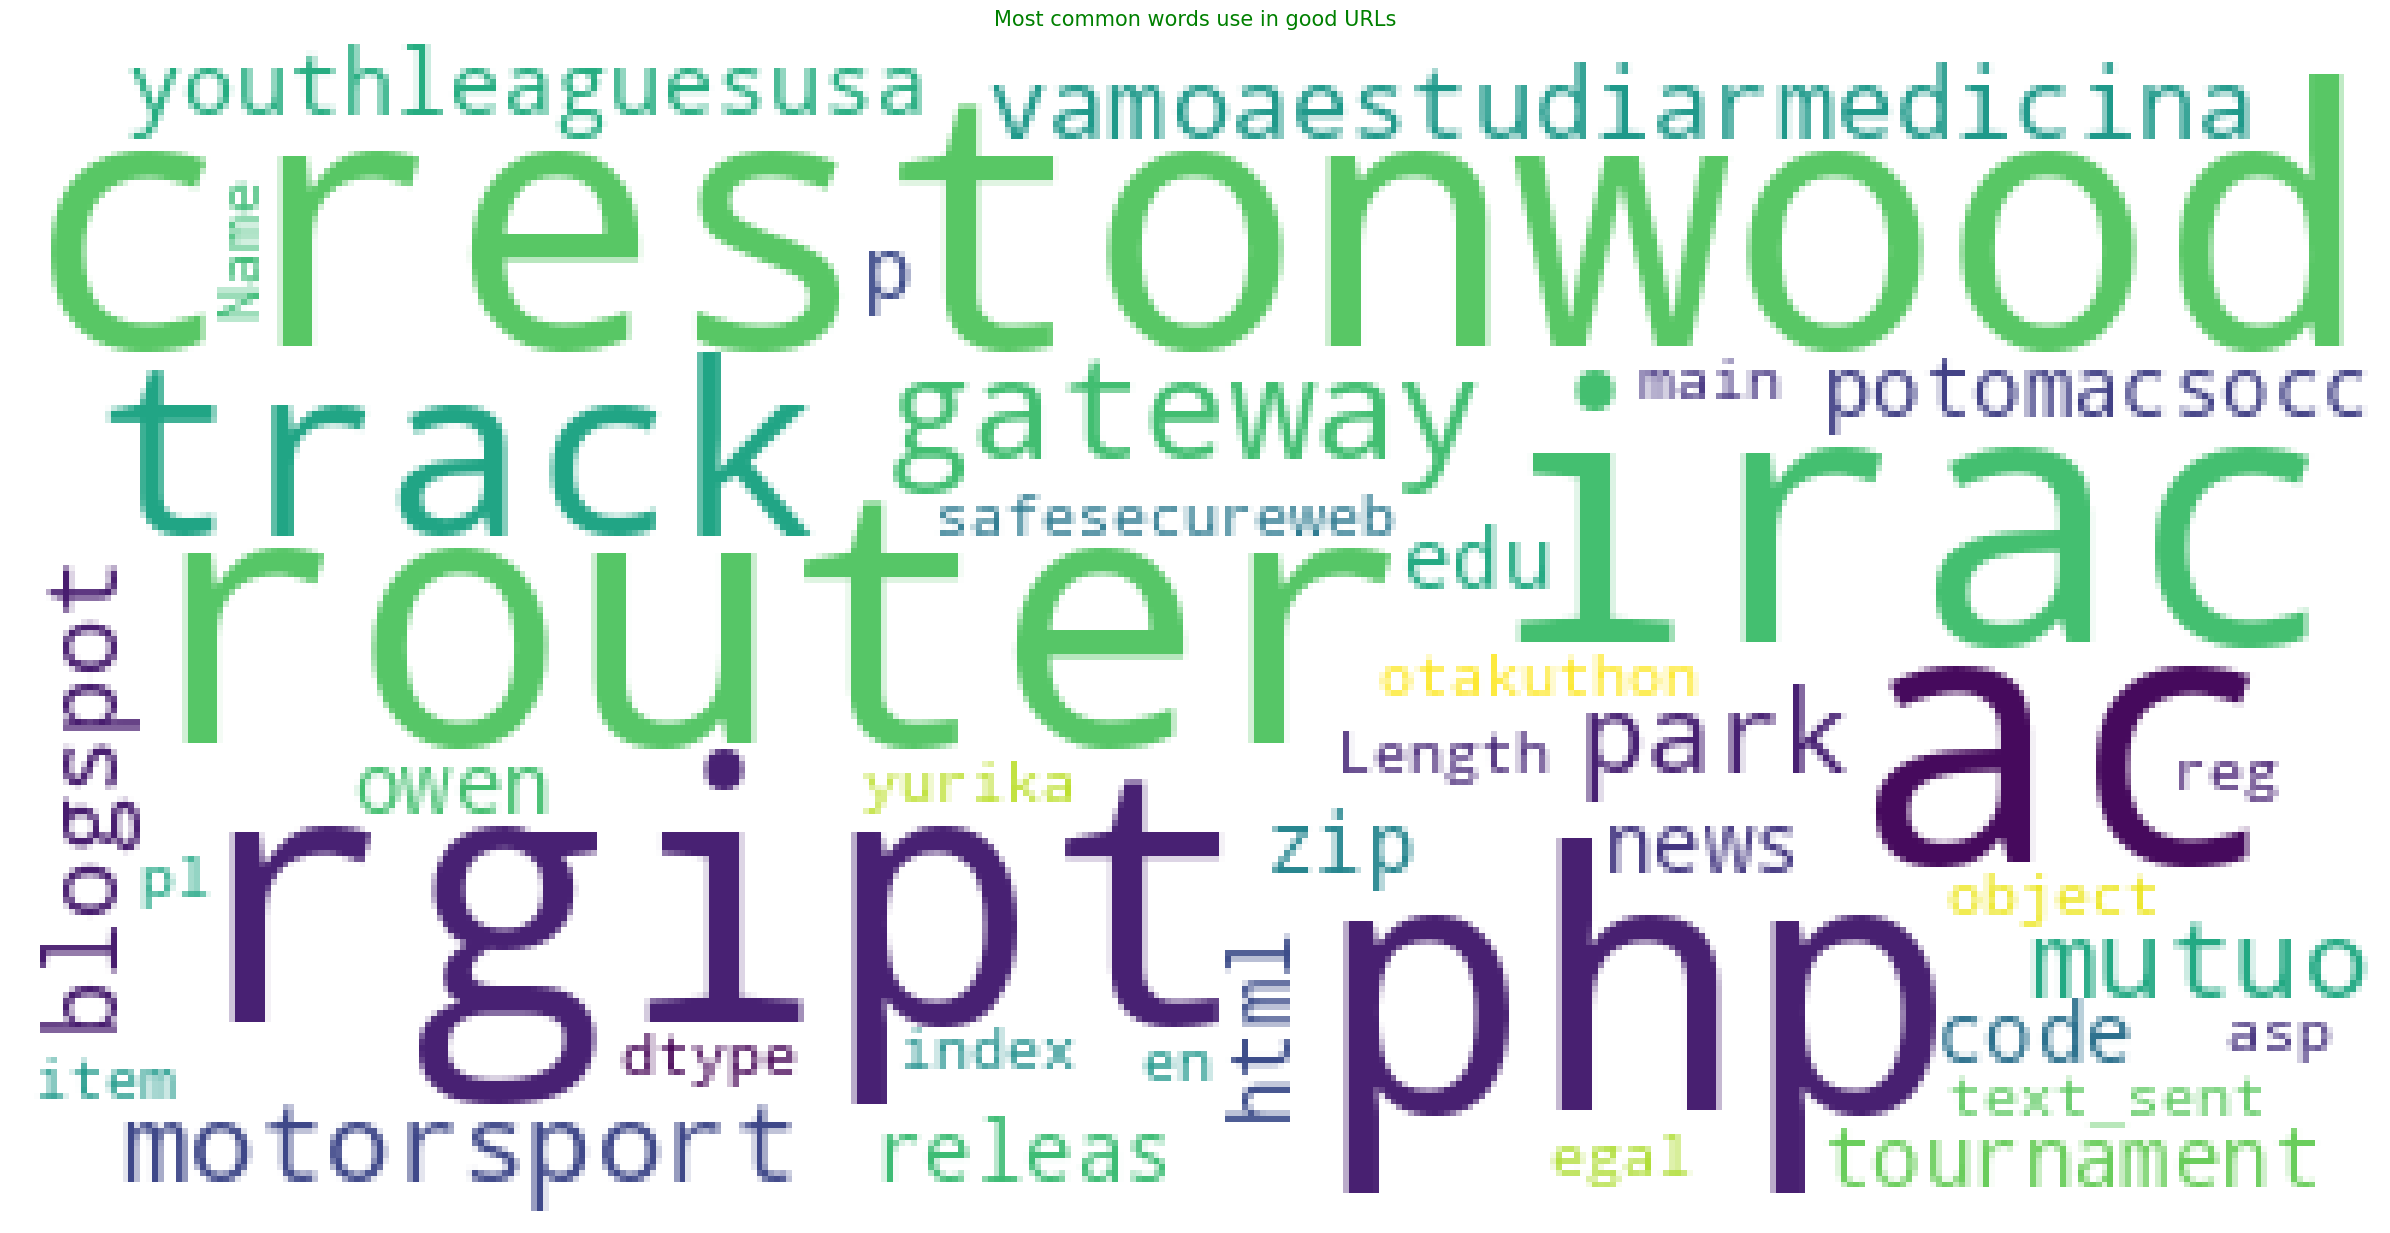

In [ ]:
common_text = str(data)
plot_wordcloud(common_text, title='Most common words use in good URLs', title_size=15)  # Removed common_mask argument

In [ ]:
data = bad_sites.text_sent
data.reset_index(drop=True, inplace=True)

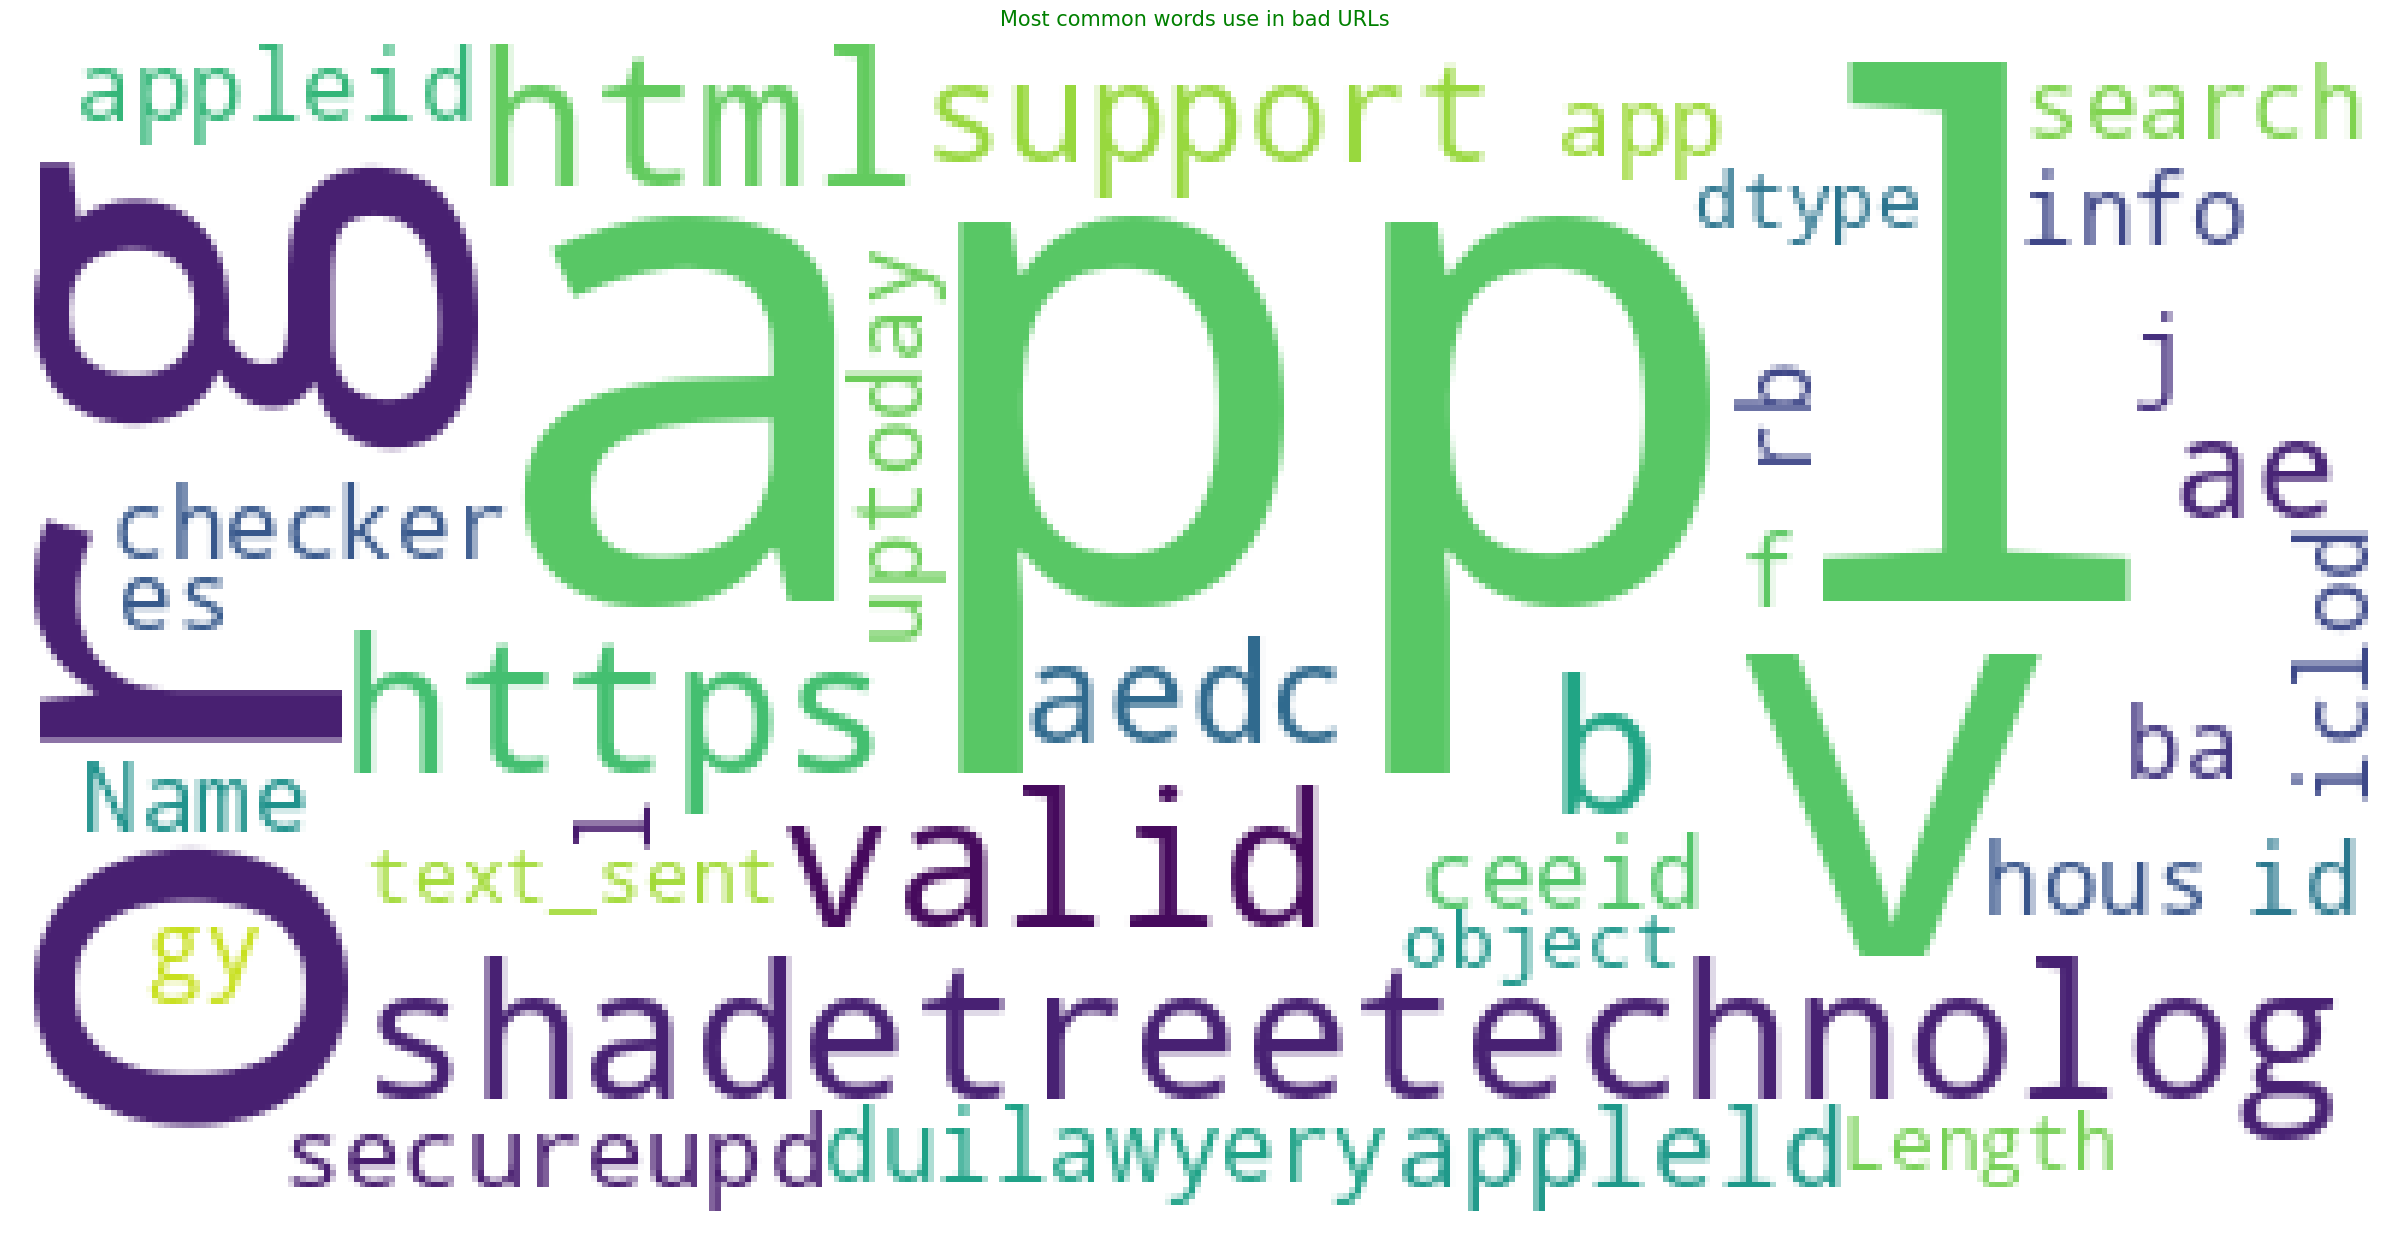

In [ ]:
common_text = str(data)
plot_wordcloud(common_text, title='Most common words use in bad URLs', title_size=15)


### Creating Model
#### CountVectorizer
* CountVectorizer is used to transform a corpora of text to a vector of term / token counts.

In [ ]:
#create cv object
cv = CountVectorizer()

In [ ]:
help(CountVectorizer())

Help on CountVectorizer in module sklearn.feature_extraction.text object:

class CountVectorizer(_VectorizerMixin, sklearn.base.BaseEstimator)
 |  CountVectorizer(*, input='content', encoding='utf-8', decode_error='strict', strip_accents=None, lowercase=True, preprocessor=None, tokenizer=None, stop_words=None, token_pattern='(?u)\\b\\w\\w+\\b', ngram_range=(1, 1), analyzer='word', max_df=1.0, min_df=1, max_features=None, vocabulary=None, binary=False, dtype=<class 'numpy.int64'>)
 |  
 |  Convert a collection of text documents to a matrix of token counts.
 |  
 |  This implementation produces a sparse representation of the counts using
 |  scipy.sparse.csr_matrix.
 |  
 |  If you do not provide an a-priori dictionary and you do not use an analyzer
 |  that does some kind of feature selection then the number of features will
 |  be equal to the vocabulary size found by analyzing the data.
 |  
 |  Read more in the :ref:`User Guide <text_feature_extraction>`.
 |  
 |  Parameters
 |  ----

In [ ]:
feature = cv.fit_transform(phish_data.text_sent) #transform all text which we tokenize and stemed

In [ ]:
feature[:5].toarray() # convert sparse matrix into array to print transformed features

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### * Spliting the data

In [ ]:
# Split data into training, validation, and testing sets with 90% train, 5% validation, and 5% test split
train_val_X, test_X, train_val_y, test_y = train_test_split(feature, phish_data.Label, test_size=0.05, random_state=42)  # Set random_state for reproducibility

# Further split the training-validation split into training and validation sets (90% train, 10% validation)
train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, test_size=0.05, random_state=42)

In [ ]:
# Check for non-zero values (optional, but informative)
print((feature != 0).sum())  # Count non-zero values in each feature column

# Handle missing values in the Label column (if necessary)
if phish_data.Label.isnull().sum() > 0:  # Check if there are missing values
    phish_data.Label.fillna(phish_data.Label.mode()[0], inplace=True)  # Fill with mode for categorical data (assuming it's categorical)
    print("Missing values in Label column filled using mode.")
else:
    print("No missing values found in Label column.")

3766704
No missing values found in Label column.


### LogisticRegression
* Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

In [ ]:
# create lr object
lr = LogisticRegression()

In [ ]:
lr.fit(train_X,train_y)

LogisticRegression()

In [ ]:
lr.score(test_X,test_y)

0.9660829558828774

.*** Logistic Regression is giving 96% accuracy, Now we will store scores in dict to see which model perform best**

Logistic Regression Training Accuracy: 0.976913699044262
Logistic Regression Testing Accuracy: 0.9660829558828774

Logistic Regression CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.96      0.94      7710
        Good       0.99      0.97      0.98     20329

    accuracy                           0.97     28039
   macro avg       0.95      0.97      0.96     28039
weighted avg       0.97      0.97      0.97     28039


Logistic Regression CONFUSION MATRIX


<Axes: >

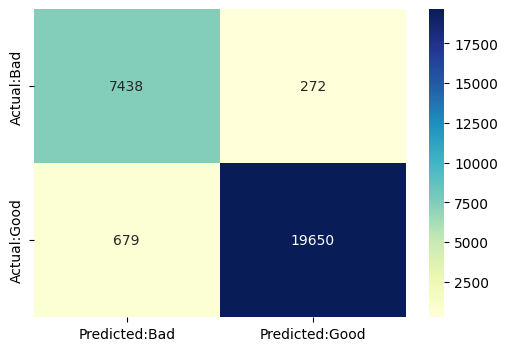

In [ ]:
# Evaluate Logistic Regression model
print('Logistic Regression Training Accuracy:', lr.score(train_X, train_y))
print('Logistic Regression Testing Accuracy:', lr.score(test_X, test_y))
con_mat = pd.DataFrame(confusion_matrix(lr.predict(test_X), test_y),
                       columns=['Predicted:Bad', 'Predicted:Good'],
                       index=['Actual:Bad', 'Actual:Good'])
print('\nLogistic Regression CLASSIFICATION REPORT\n')
print(classification_report(lr.predict(test_X), test_y, target_names=['Bad', 'Good']))
print('\nLogistic Regression CONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

### MultinomialNB
* Applying Multinomial Naive Bayes to NLP Problems. Naive Bayes Classifier Algorithm is a family of probabilistic algorithms based on applying Bayes' theorem with the “naive” assumption of conditional independence between every pair of a feature.

In [ ]:
# create mnb object
mnb = MultinomialNB()

In [ ]:
mnb.fit(train_X,train_y)

MultinomialNB()

In [ ]:
mnb.score(test_X,test_y)

0.958985698491387

*** MultinomialNB gives us 95% accuracy**  

Multinomial Naive Bayes Training Accuracy: 0.9729836534604753
Multinomial Naive Bayes Testing Accuracy: 0.958985698491387

Multinomial Naive Bayes CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.93      0.93      0.93      8083
        Good       0.97      0.97      0.97     19956

    accuracy                           0.96     28039
   macro avg       0.95      0.95      0.95     28039
weighted avg       0.96      0.96      0.96     28039


Multinomial Naive Bayes CONFUSION MATRIX


<Axes: >

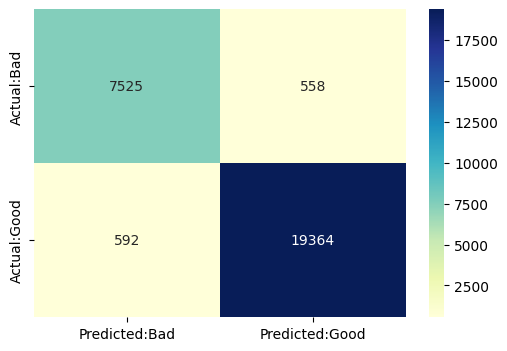

In [ ]:
# Evaluate Multinomial Naive Bayes model
print('Multinomial Naive Bayes Training Accuracy:', mnb.score(train_X, train_y))
print('Multinomial Naive Bayes Testing Accuracy:', mnb.score(test_X, test_y))
con_mat = pd.DataFrame(confusion_matrix(mnb.predict(test_X), test_y),
                       columns=['Predicted:Bad', 'Predicted:Good'],
                       index=['Actual:Bad', 'Actual:Good'])
print('\nMultinomial Naive Bayes CLASSIFICATION REPORT\n')
print(classification_report(mnb.predict(test_X), test_y, target_names=['Bad', 'Good']))
print('\nMultinomial Naive Bayes CONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

<Axes: xlabel='None', ylabel='Accuracy'>

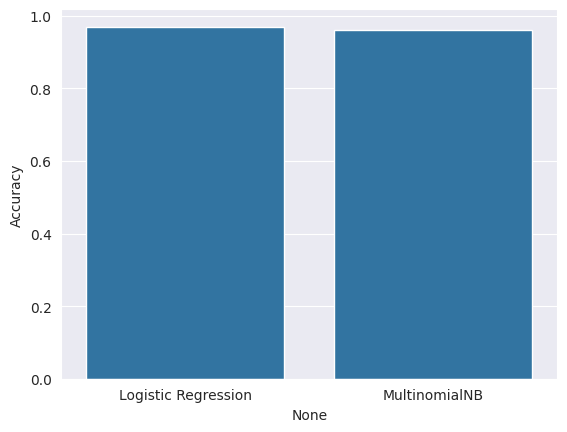

In [ ]:
# Compare models' accuracy
Scores_ml = {
    'Logistic Regression': np.round(lr.score(test_X, test_y), 2),
    'MultinomialNB': np.round(mnb.score(test_X, test_y), 2)
}
acc = pd.DataFrame.from_dict(Scores_ml, orient='index', columns=['Accuracy'])
sns.set_style('darkgrid')
sns.barplot(x=acc.index, y=acc.Accuracy)

*** So, Logistic Regression is the best fit model, Now we make sklearn pipeline using Logistic Regression**

In [ ]:
# Create and save a pipeline with the best-performing model (assuming Logistic Regression here)
pipeline_ls = make_pipeline(CountVectorizer(tokenizer=RegexpTokenizer(r'[A-Za-z]+').tokenize, stop_words='english'), LogisticRegression())

In [ ]:
# Split data into training, validation, and testing sets with 90% train, 5% validation, and 5% test
train_val_X, test_X, train_val_y, test_y = train_test_split(phish_data.URL, phish_data.Label, test_size=0.05, random_state=42)
train_X, val_X, train_y, val_y = train_test_split(train_val_X, train_val_y, test_size=0.05, random_state=42)


In [ ]:
pipeline_ls.fit(train_X,train_y)

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('logisticregression', LogisticRegression())])

In [ ]:
pipeline_ls.score(test_X,test_y)

0.967366881843147

Pipeline Logistic Regression Training Accuracy: 0.9764454130697232
Pipeline Logistic Regression Testing Accuracy: 0.967366881843147

Pipeline Logistic Regression CLASSIFICATION REPORT

              precision    recall  f1-score   support

         Bad       0.92      0.97      0.94      7724
        Good       0.99      0.97      0.98     20315

    accuracy                           0.97     28039
   macro avg       0.95      0.97      0.96     28039
weighted avg       0.97      0.97      0.97     28039


Pipeline Logistic Regression CONFUSION MATRIX


<Axes: >

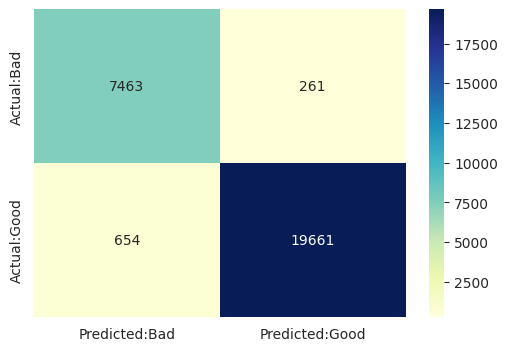

In [ ]:
print('Pipeline Logistic Regression Training Accuracy:', pipeline_ls.score(train_X, train_y))
print('Pipeline Logistic Regression Testing Accuracy:', pipeline_ls.score(test_X, test_y))
con_mat = pd.DataFrame(confusion_matrix(pipeline_ls.predict(test_X), test_y),
                       columns=['Predicted:Bad', 'Predicted:Good'],
                       index=['Actual:Bad', 'Actual:Good'])
print('\nPipeline Logistic Regression CLASSIFICATION REPORT\n')
print(classification_report(pipeline_ls.predict(test_X), test_y, target_names=['Bad', 'Good']))
print('\nPipeline Logistic Regression CONFUSION MATRIX')
plt.figure(figsize=(6, 4))
sns.heatmap(con_mat, annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
# Save the best model to disk
pickle.dump(pipeline_ls, open('phishing.pkl', 'wb'))

In [ ]:
# Load the model from disk and make predictions
loaded_model = pickle.load(open('phishing.pkl', 'rb'))
result = loaded_model.score(test_X, test_y)
print('Loaded Model Testing Accuracy:', result)

Loaded Model Testing Accuracy: 0.967366881843147


* Bad links => this are phishing sites
yeniik.com.tr/wp-admin/js/login.alibaba.com/login.jsp.php
fazan-pacir.rs/temp/libraries/ipad
www.tubemoviez.exe
svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt

* Good links => this are not phishing sites
www.youtube.com/
youtube.com/watch?v=qI0TQJI3vdU
www.retailhellunderground.com/
restorevisioncenters.com/html/technology.html

In [ ]:
import whois
import socket
import ssl
from urllib.parse import urlparse

# Test the loaded model with new samples
predict_bad = ['https://www.udemy.com','https://www.google.com/', 'https://www.facebook.com/', 'https://bhubaneswarcuttackpolice.gov.in/', 'rb.gy/j6v7f6?id=1964338349', 'fazan-pacir.rs/temp/libraries/ipad', 'svision-online.de/mgfi/administrator/components/com_babackup/classes/fx29id1.txt']
predict_good = ['https://www.facebook.com/', 'https://www.geeksforgeeks.org', 'https://www.udemy.com']

result_bad = loaded_model.predict(predict_bad)
result_good = loaded_model.predict(predict_good)

# Extract domain names from URLs
def extract_domain(url):
    parsed_url = urlparse(url)
    return parsed_url.netloc

def is_ssl_certified(url):
    parsed_url = urlparse(url)
    host = parsed_url.netloc

    if not host:
        return False, "Invalid URL"

    context = ssl.create_default_context()
    try:
        with socket.create_connection((host, 443)) as sock:
            with context.wrap_socket(sock, server_hostname=host) as ssock:
                ssl_info = ssock.getpeercert()
                return True, ssl_info
    except Exception as e:
        return False, str(e)

all_urls = predict_bad
domains = [extract_domain(url) for url in all_urls]

domain_name = []
registrar = []
creation_date = []
emails = []
name = []
org = []
whois_server = []
ip_address = []
ssl_certified = []
ssl_info = []

for domain in domains:
    try:
        w = whois.whois(domain)
        domain_name.append(w.domain_name[0] if isinstance(w.domain_name, list) else w.domain_name)
        registrar.append(w.registrar)
        creation_date.append(w.creation_date)
        emails.append(w.emails)
        name.append(w.name)
        org.append(w.org)
        whois_server.append(w.whois_server)
    except whois.parser.PywhoisError:
        domain_name.append("Domain not found")
        registrar.append("Registrar not found")
        creation_date.append("Creation date not found")
        emails.append("Emails not found")
        name.append("Name not found")
        org.append("Org not found")
        whois_server.append("Whois server not found")

for domain in domain_name:
    if domain and isinstance(domain, str) and domain != "Domain not found":
        try:
            ip_address.append(socket.gethostbyname(domain.lower()))
        except socket.gaierror:
            ip_address.append("IP address not found")
    else:
        ip_address.append("IP address not found")

for url in all_urls:
    is_ssl, info = is_ssl_certified(url)
    ssl_certified.append(is_ssl)
    ssl_info.append(info)

print('Predictions for bad URLs:', result_bad)
print("*" * 500)
print('Predictions for good URLs:', result_good)
print("*" * 500)
print('domain_names:', domain_name)
print('registrar:', registrar)
print('website_age:', creation_date)
print('email:', emails)
print('name:', name)
print('org:', org)
print('whois_server:', whois_server)
print('ip:', ip_address)
print('ssl_certified:', ssl_certified)
print('ssl_info:', ssl_info)


Predictions for bad URLs: ['good' 'good' 'good' 'good' 'bad' 'bad' 'bad']
********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Predictions for good URLs: ['good' 'good' 'good']
***************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************